In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
w_init = 0.1
n = 20
m = n
iters = 20000
alpha = 0.2

A = np.zeros((m, n))
for i in range(m):
    A[i, i] = 1


In [66]:
def ReLU(x):
    return np.maximum(x, 0)

def dReLU(x):
    return ReLU(np.sign(x))

def grad(w, x):
    wx = w.dot(x)
    if wx < 0:
        return np.zeros_like(w)

    x_hat = w * ReLU(wx)
    wx_hat = w.dot(x_hat)
    return (x_hat - x) * wx + x * (wx_hat - wx)

In [67]:
# w = w_init * np.random.randn(n) / np.sqrt(n)
w = w_init * np.ones(n) / np.sqrt(n)

w_history = np.zeros((iters + 1, n))
w_history[0] = w

for iter in range(1, iters + 1):
    i = (iter - 1) % m
    x = A[i]
    w += -alpha * grad(w, x)
    w_history[iter] = w

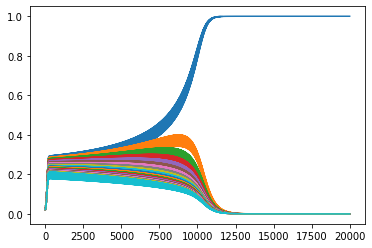

0.022360679774997897 1.0
[0.02236068 0.02236068 0.02236068 0.02236068 0.02236068 0.02236068
 0.02236068 0.02236068 0.02236068 0.02236068 0.02236068 0.02236068
 0.02236068 0.02236068 0.02236068 0.02236068 0.02236068 0.02236068
 0.02236068 0.02236068]
[1.00000000e+00 8.61971656e-10 6.36717912e-10 5.33286489e-10
 4.70526210e-10 4.27222937e-10 3.95013593e-10 3.69839012e-10
 3.49457350e-10 3.32515337e-10 3.18141015e-10 3.05743726e-10
 2.94907178e-10 2.85328360e-10 2.76780739e-10 2.69091100e-10
 2.62124419e-10 2.55773670e-10 2.49952781e-10 2.44591632e-10]


In [68]:
for i in range(m):
    plt.plot(np.arange(iters + 1), w_history[:, i])
plt.show()

print(np.max(w_history[0]), np.max(w_history[iters]))
print(w_history[0])
print(w_history[iters])

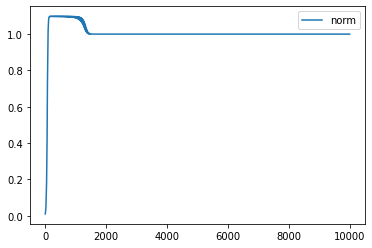

In [56]:
norm = np.sum(np.square(w_history), axis=1)
plt.plot(np.arange(iters + 1), norm, label="norm")
plt.legend()
plt.show()